# Flight Price Prediction

### 1. Data Preprocessing 

#### 1.1 Import necessary packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

#### 1.2 Import dataset

In [2]:
# no time-series data here
df = pd.read_csv('./data/Flight_Prices.csv', index_col=0) #load the dataset into your jupyter notebook
df.head() # Take a short look into the loaded data. 

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


1.4.2 Encoding

In [3]:
# Label Encoding to convert categorical variables into numerical variables
# A MultiColumnLabelEncoder is defined to perform Label Encoding over multiple columns instead of one.
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [4]:
# Label Encode multiple columns
df_LabelEncoding = MultiColumnLabelEncoder(columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 
                                                           'destination_city', 'class']).fit_transform(df)

# Show the first five rows 
df_LabelEncoding

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


1.4.3 Feature Scaling



In [5]:
#MinMaxScaling based on one_hot_encoded_data
from sklearn.preprocessing import MinMaxScaler


min_max = MinMaxScaler()
df_scaled = min_max.fit_transform(df_LabelEncoding)
column_headers = ['airline', 
                  'flight', 
                  'source_city',
                  'departure_time',
                  'stops',
                  'arrival_time',
                  'destination_city',
                  'class',
                  'duration',
                  'days_left',
                  'price']

df_scaled = pd.DataFrame(df_scaled, columns=column_headers)

In [6]:
df_scaled

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.8,0.902564,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.889103,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.777564,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.999359,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.992949,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...,...,...,...,...
300148,1.0,0.946795,0.2,0.8,0.0,0.4,0.6,0.0,0.188776,1.0,0.558844
300149,1.0,0.949359,0.2,0.0,0.0,1.0,0.6,0.0,0.195714,1.0,0.623124
300150,1.0,0.952564,0.2,0.2,0.0,1.0,0.6,0.0,0.265306,1.0,0.639473
300151,1.0,0.950641,0.2,0.2,0.0,0.4,0.6,0.0,0.187143,1.0,0.659856


## 2. Multiple Linear Regression

In [7]:
# Setting the target variable 
# price was set as target label
X = df_scaled.iloc[:, :-1] # as input variables
y = df_scaled.iloc[:, -1] # as target variable (label)

In [8]:
# X := multiple variables in scaled version
X

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.8,0.902564,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0
1,0.8,0.889103,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0
2,0.0,0.777564,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0
3,1.0,0.999359,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0
4,1.0,0.992949,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0
...,...,...,...,...,...,...,...,...,...,...
300148,1.0,0.946795,0.2,0.8,0.0,0.4,0.6,0.0,0.188776,1.0
300149,1.0,0.949359,0.2,0.0,0.0,1.0,0.6,0.0,0.195714,1.0
300150,1.0,0.952564,0.2,0.2,0.0,1.0,0.6,0.0,0.265306,1.0
300151,1.0,0.950641,0.2,0.2,0.0,0.4,0.6,0.0,0.187143,1.0


In [9]:
#10 attributes that should predict the dependent variable
len(X.columns)

10

In [10]:
#price label as depenendtent variable
y

0         0.039749
1         0.039749
2         0.039773
3         0.039765
4         0.039765
            ...   
300148    0.558844
300149    0.623124
300150    0.639473
300151    0.659856
300152    0.659856
Name: price, Length: 300153, dtype: float64

#### 2.1.1 Splitting the data into training and testing data

In this example, we split the dataset into 70% training data and 30% test data. 

In [11]:
# Splitting the data into training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

#### 2.1.2  Model Application

In [12]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), 
                  np.matmul(X_train_0.T,y_train)) 

In [13]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
airline,0.037717
flight,0.003167
source_city,0.004345
departure_time,0.001452
stops,-0.053876
arrival_time,0.007580
destination_city,0.005023
class,-0.365134
duration,0.036414
days_left,-0.051849


Interpretation of determined coefficients

Holding all other features fixed, a 1 unit increase in e.g., 'duration' is associated with an increase of 0.036414 units

In [16]:
#Parameters of the regression line for each of the multiple variables
sk_theta = [regressor.intercept_]+list(regressor.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,0.404063,0.404063
1,theta_1,airline,0.037717,0.037717
2,theta_2,flight,0.003167,0.003167
3,theta_3,source_city,0.004345,0.004345
4,theta_4,departure_time,0.001452,0.001452
5,theta_5,stops,-0.053876,-0.053876
6,theta_6,arrival_time,0.007580,0.007580
7,theta_7,destination_city,0.005023,0.005023
8,theta_8,class,-0.365134,-0.365134
9,theta_9,duration,0.036414,0.036414


### 3. Evaluation

In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

- Linear Relationship
- The residual error plot should be normally distributed.
- The mean of residual error should be 0 or close to 0 as much as possible
- The linear regression require all variables to be multivariate normal. 
- Linear regession assumes that there is little or no multicollinearity in the data. 
- Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. 

In [17]:
#Here Calculation example
#überspringen

import math

# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

#Evaluation: RMSE
rmse = math.sqrt(J_mse)

# R_squared
# R-squared is the percentage of the dependent variable variation that a linear model explains
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)

print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('The Root Mean Square Error (RMSE) is: ',rmse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.0032981331395804275
The Root Mean Square Error (RMSE) is:  0.05742937523237065
R square obtain for normal equation method is : 0.9046721401431135


In [18]:
# sklearn regression module quality measures --> diese hier zeigen
y_pred_sk = regressor.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

#Evaluation: RMSE
rmse = math.sqrt(J_mse_sk)

# R_square
R_square_sk = regressor.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('The Root Mean Square Error (RMSE) is: ',rmse)
print('R squared obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.0032981331395804275
The Root Mean Square Error (RMSE) is:  0.05742937523237065
R squared obtain for scikit learn library is : 0.9046721401431135


In [19]:
#predicted scaled outcomes
y_pred_sk

array([ 0.02835891,  0.42435062,  0.05579543, ..., -0.02640465,
        0.03908087, -0.03684055])

The model returns a R squared value of 90.46%, so it fits quite well.

R squared is statistical measure of how close data are to the fitted regression line. 
R squared lies always between 0 to 100%.
- 0% indicates that model explains none of the variability of the response data around it's mean. 
- 100% indicates that model explains all the variablity of the response data around the mean.

### Model Validation

C:\Users\Kaya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


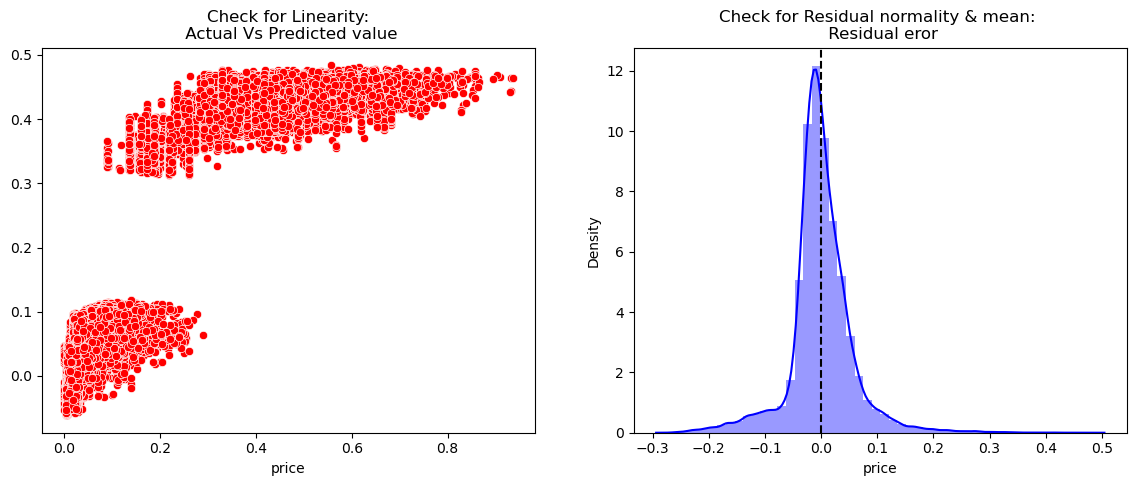

In [22]:
# Check for Linearity
# In our model the actual vs predicted plot is curve so linear assumption fails

f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [23]:
#The residual mean is near to zero and residual error plot right skewed - 
(y_test - y_pred_sk).mean()

-0.00025161083619860747

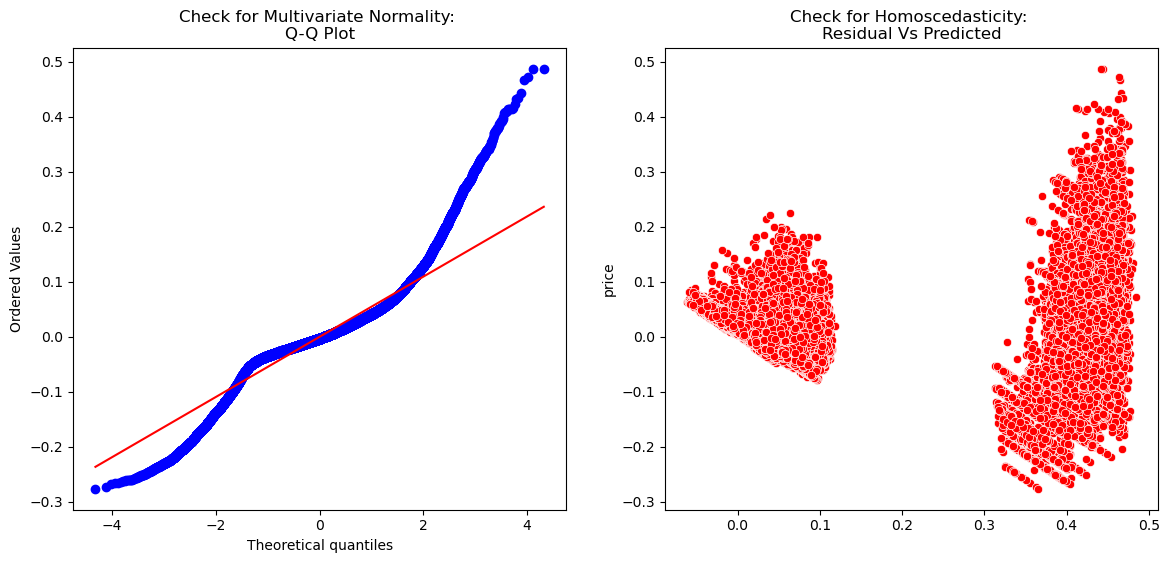

In [24]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
# If the points on the plot roughly form a straight diagonal line, then the normality assumption ... 
# is met. This not really the case here (see  left figure)
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

The Q-Q plot clearly shows that the quantile points do not lie on the theoretical normal line. 

The variance inflation factor (VIF) describes the ratio (the quotient) between the variance of the estimate of a parameter in a model that has multiple other parameters and the variance of a model which uses a single parameter.

In [25]:
# Check for Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

10.490112769774509

Variance inflation factor value is more than 10, so there exists high multicollearity.

VIF equal to 1 = variables are not correlated;
VIF between 1 and 5 = variables are moderately correlated;
VIF greater than 5 = variables are highly correlated

The potential solutions include the following:

Remove some of the highly correlated independent variables.
Linearly combine the independent variables, such as adding them together.

--> We see that we should rather use other kind of regression method in this example --> give students a better set where pre-conditions are fulfilled

### Write prediction results

In [26]:
#Actual scaled prices
y_test

27131     0.051334
266857    0.522490
141228    0.041733
288329    0.484192
97334     0.044873
            ...   
123895    0.041233
251253    0.540306
8335      0.010700
68668     0.014184
108970    0.018759
Name: price, Length: 90046, dtype: float64

In [27]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 90046 entries, 27131 to 108970
Series name: price
Non-Null Count  Dtype  
--------------  -----  
90046 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [28]:
#predicted scaled prices
y_pred_sk

array([ 0.02835891,  0.42435062,  0.05579543, ..., -0.02640465,
        0.03908087, -0.03684055])

In [29]:
df_pred_price = pd.DataFrame(y_pred_sk, columns = ['Predicted scaled prices'])
df_pred_price

,Predicted scaled prices
0,0.028359
1,0.424351
2,0.055795
3,0.451295
4,0.045576
...,...
90041,0.045373
90042,0.435966
90043,-0.026405
90044,0.039081


### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# k-fold CV 
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores    

array([0.9063204 , 0.90486275, 0.906098  , 0.90359384, 0.90372144,
       0.90484246, 0.90214308, 0.90532598, 0.90465548, 0.90427651])

Hypermaramter Tuning

In [31]:
len(X_train.columns)

10

In [32]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
# number of candidates
hyper_params = [{'n_features_to_select': list(range(1, 11))}]


# step-3: perform grid search
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [33]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(model_cv.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (model_cv.best_params_))

GridSearch CV best score : 0.9046


Parameters that give the best results : 

 {'n_features_to_select': 10}


In [34]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.186307,0.042899,0.001499,0.000500,1,{'n_features_to_select': 1},0.879416,0.877189,0.880323,0.877649,...,0.879223,0.879520,0.879147,0.879108,0.879441,0.879167,0.879149,0.879683,0.879333,0.000196
1,0.234235,0.017939,0.003308,0.002626,2,{'n_features_to_select': 2},0.891126,0.890046,0.892764,0.890376,...,0.891277,0.891542,0.891315,0.891186,0.891557,0.891320,0.891282,0.891742,0.891426,0.000167
2,0.218141,0.025532,0.004247,0.003916,3,{'n_features_to_select': 3},0.897561,0.896208,0.899930,0.896913,...,0.897704,0.898039,0.897873,0.897753,0.898001,0.897767,0.897845,0.898205,0.897927,0.000157
3,0.218518,0.029332,0.002262,0.003066,4,{'n_features_to_select': 4},0.903706,0.901600,0.905221,0.902852,...,0.903379,0.903643,0.903551,0.903463,0.903621,0.903316,0.903473,0.903865,0.903564,0.000162
4,0.194436,0.029474,0.003053,0.003182,5,{'n_features_to_select': 5},0.904395,0.902386,0.905790,0.903567,...,0.904087,0.904334,0.904235,0.904170,0.904304,0.904020,0.904165,0.904560,0.904258,0.000156
5,0.182812,0.026988,0.001963,0.003225,6,{'n_features_to_select': 6},0.904535,0.902567,0.906019,0.903740,...,0.904287,0.904540,0.904439,0.904376,0.904495,0.904226,0.904369,0.904753,0.904460,0.000154
6,0.148346,0.010265,0.001791,0.003270,7,{'n_features_to_select': 7},0.904562,0.902596,0.906119,0.903703,...,0.904338,0.904606,0.904495,0.904433,0.904546,0.904284,0.904427,0.904802,0.904517,0.000154
7,0.128461,0.018342,0.006112,0.003845,8,{'n_features_to_select': 8},0.904689,0.902566,0.906130,0.903800,...,0.904407,0.904666,0.904565,0.904497,0.904611,0.904341,0.904490,0.904861,0.904581,0.000154
8,0.092626,0.011008,0.003267,0.003657,9,{'n_features_to_select': 9},0.904701,0.902564,0.906154,0.903811,...,0.904418,0.904678,0.904578,0.904508,0.904622,0.904352,0.904503,0.904872,0.904592,0.000155
9,0.057388,0.003773,0.004484,0.004057,10,{'n_features_to_select': 10},0.904717,0.902556,0.906175,0.903813,...,0.904423,0.904686,0.904588,0.904514,0.904631,0.904359,0.904511,0.904878,0.904600,0.000155
